In [34]:
# ! pip install tensorflow

### Implementing ANN (Artificial Neural Network)

Epoch 1/20


C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3991 - loss: 1.7081 - val_accuracy: 0.6271 - val_loss: 1.1027
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5712 - loss: 1.2187 - val_accuracy: 0.6464 - val_loss: 1.0107
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5981 - loss: 1.1350 - val_accuracy: 0.6602 - val_loss: 0.9762
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6159 - loss: 1.0975 - val_accuracy: 0.6618 - val_loss: 0.9592
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6197 - loss: 1.0858 - val_accuracy: 0.6635 - val_loss: 0.9465
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6287 - loss: 1.0561 - val_accuracy: 0.6700 - val_loss: 0.9319
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6311 - loss: 1.0423 - val_accuracy: 0.6713 - val_loss: 0.9226
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6350 - loss: 1.0407 - val_accurac

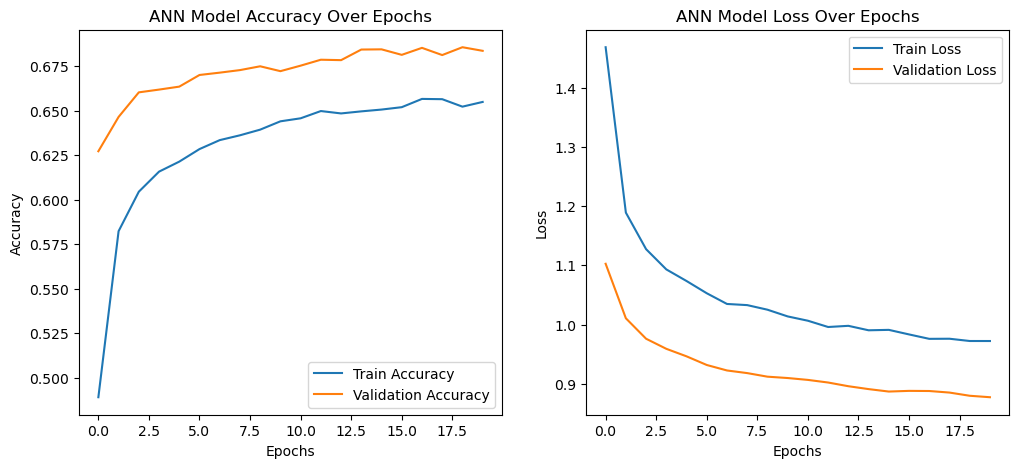

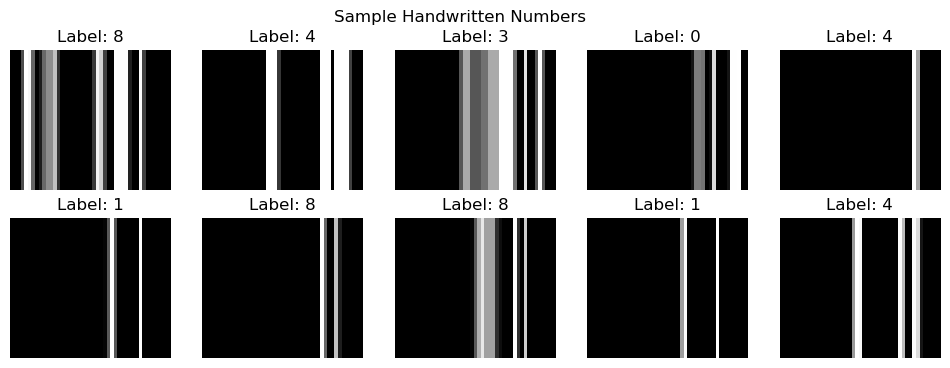

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


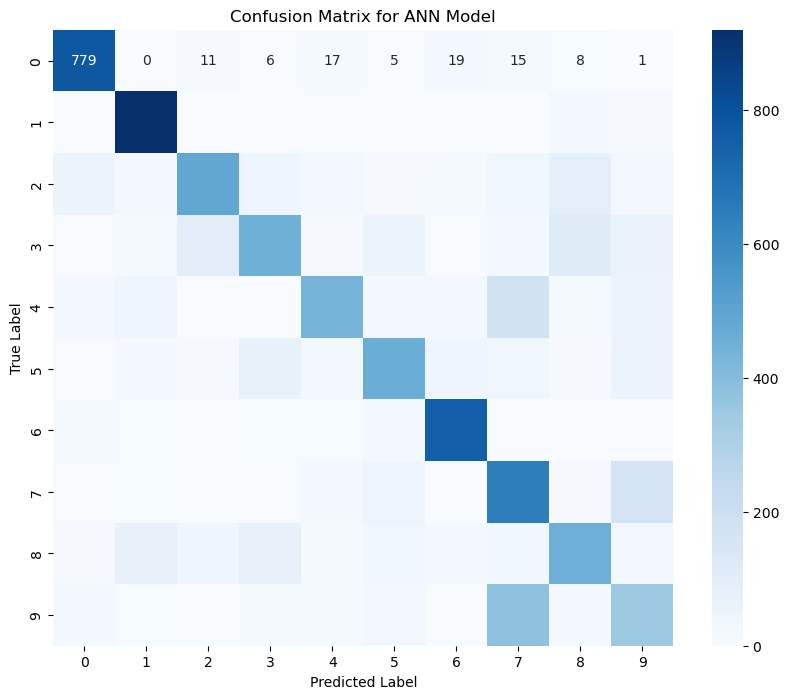

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("letters.csv")

# Extract features and labels
X = df.iloc[:, 1:].values  # Pixel values
y = df.iloc[:, 0].values   # Labels

# Normalize pixel values to range [0,1]
X = X / 255.0

# Reshape X to fit ANN input
X = X.reshape(-1, 45)  # Flattened input for fully connected layers

# Convert labels to categorical (one-hot encoding for classification)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(45,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Model Accuracy Over Epochs')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Model Loss Over Epochs')

plt.show()

# Visualize sample images
num_samples = 10
random_indices = np.random.choice(len(X_train), num_samples, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx].reshape(1, -1), cmap="gray", aspect="auto")
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis("off")

plt.suptitle("Sample Handwritten Numbers")
plt.show()

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for ANN Model")
plt.show()


### Implementing Convolutional Neural Network (CNN)

Epoch 1/20


C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4725 - loss: 1.4925 - val_accuracy: 0.6486 - val_loss: 1.0120
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6296 - loss: 1.0551 - val_accuracy: 0.6710 - val_loss: 0.9430
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6529 - loss: 0.9936 - val_accuracy: 0.6775 - val_loss: 0.9310
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6602 - loss: 0.9636 - val_accuracy: 0.6812 - val_loss: 0.9033
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6708 - loss: 0.9433 - val_accuracy: 0.6902 - val_loss: 0.8840
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6745 - loss: 0.9214 - val_accuracy: 0.6935 - val_loss: 0.8784
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6795 - loss: 0.9186 - val_accuracy: 0.7005 - val_loss: 0.8633
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6835 - loss: 0.9016 - val_accurac

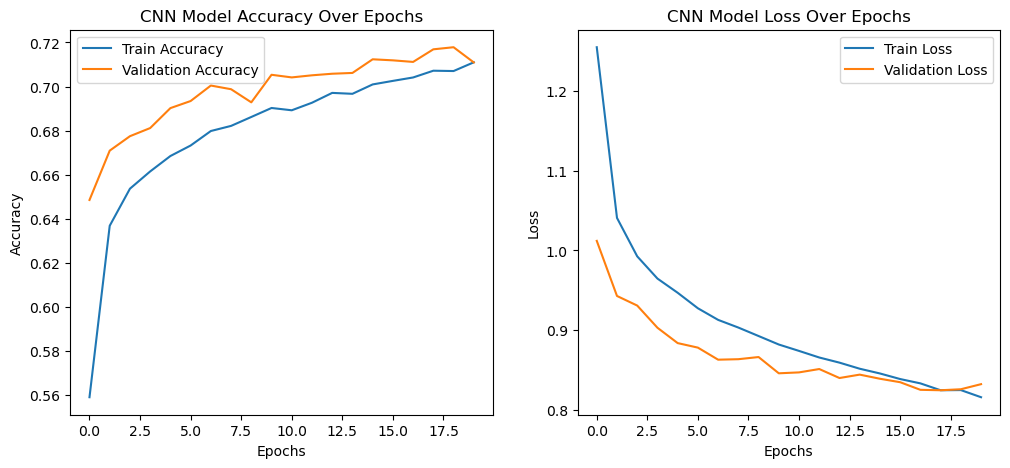

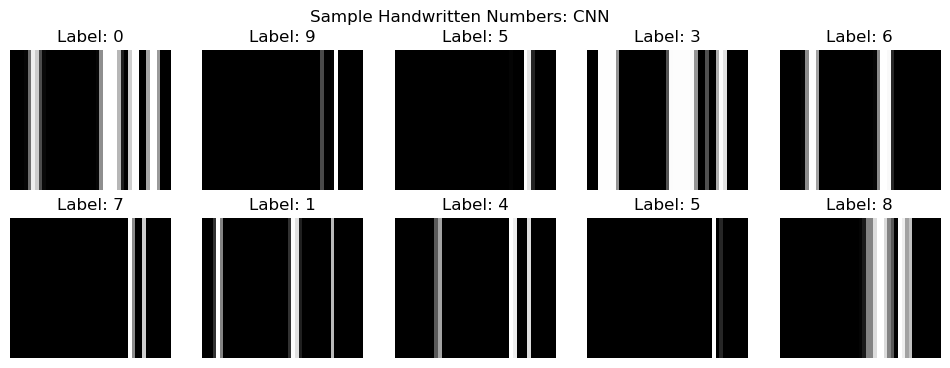

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


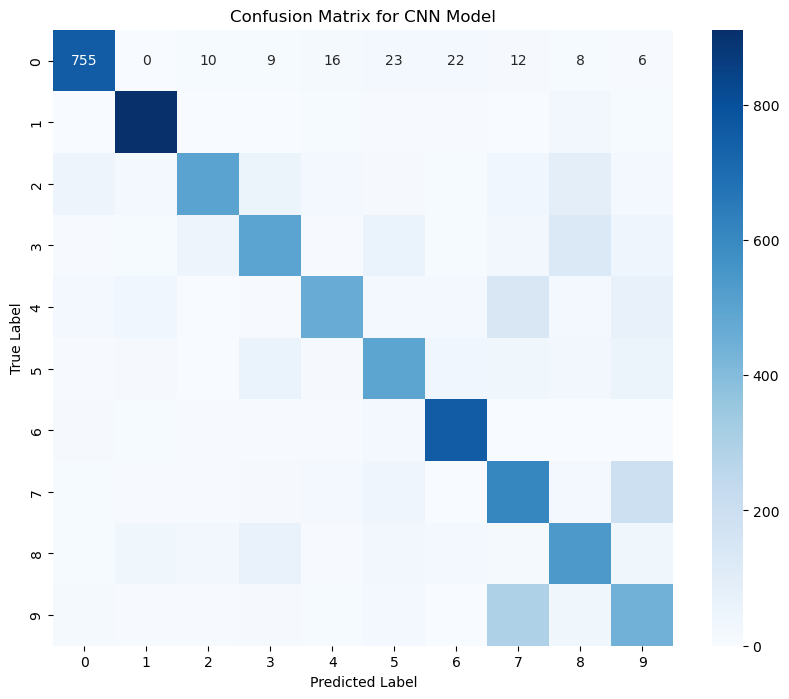

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("letters.csv")

# Extract features and labels
X = df.iloc[:, 1:].values  # Pixel values
y = df.iloc[:, 0].values   # Labels

# Normalize pixel values to range [0,1]
X = X / 255.0

# Reshape X to fit CNN input (assuming a 1D convolution model)
X = X.reshape(-1, 45, 1)  # (samples, width, channels)

# Convert labels to categorical (one-hot encoding for classification)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(45, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model Accuracy Over Epochs')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Model Loss Over Epochs')

plt.show()

# Visualize sample images
num_samples = 10
random_indices = np.random.choice(len(X_train), num_samples, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx].reshape(1, -1), cmap="gray", aspect="auto")
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis("off")

plt.suptitle("Sample Handwritten Numbers: CNN")
plt.show()

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN Model")
plt.show()


###  Implementing Recurrent Neural Network (RNN)

Epoch 1/20


C:\Users\Mohammed Saif Wasay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - accuracy: 0.3665 - loss: 1.7325 - val_accuracy: 0.5708 - val_loss: 1.2116
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.5602 - loss: 1.2313 - val_accuracy: 0.6211 - val_loss: 1.0767
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6098 - loss: 1.1153 - val_accuracy: 0.6414 - val_loss: 1.0361
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.6334 - loss: 1.0501 - val_accuracy: 0.6625 - val_loss: 0.9617
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.6512 - loss: 0.9980 - val_accuracy: 0.6688 - val_loss: 0.9358
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.6616 - loss: 0.9664 - val_accuracy: 0.6692 - val_loss: 0.9340
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.6644 - loss: 0.9456 - val_accuracy: 0.6754 - val_loss: 0.9188
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.6726 - loss: 0.92

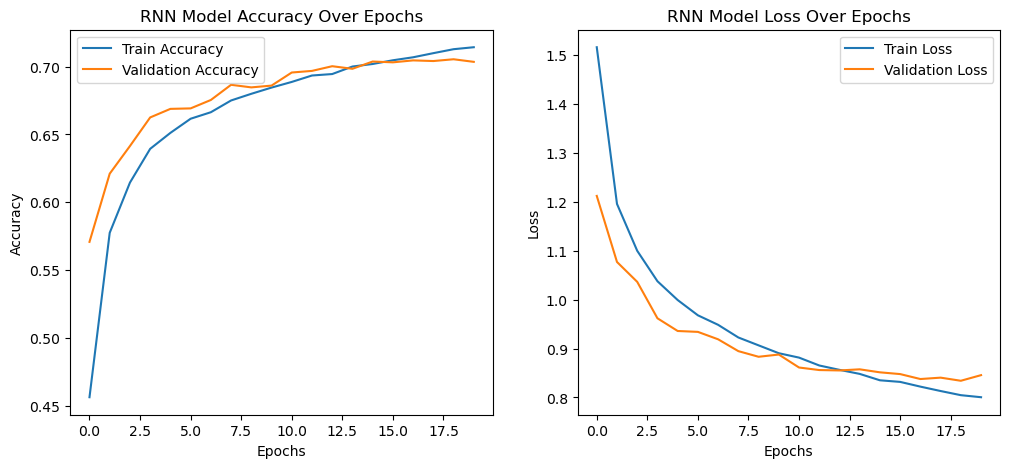

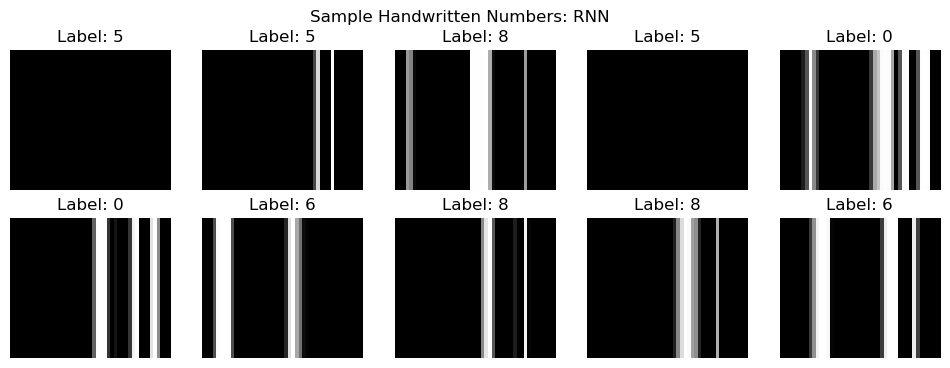

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


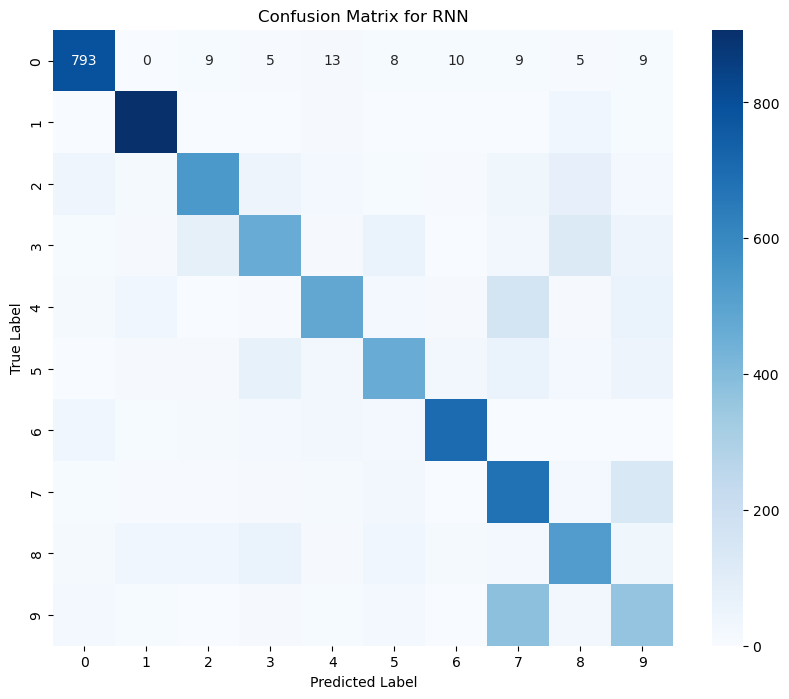

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("letters.csv")

# Extract features and labels
X = df.iloc[:, 1:].values  # Pixel values
y = df.iloc[:, 0].values   # Labels

# Normalize pixel values to range [0,1]
X = X / 255.0

# Reshape X to fit RNN input (sequence format for LSTM)
X = X.reshape(-1, 45, 1)  # (samples, time steps, features)

# Convert labels to categorical (one-hot encoding for classification)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RNN model using LSTM
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(45, 1)),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RNN Model Accuracy Over Epochs')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('RNN Model Loss Over Epochs')

plt.show()

# Visualize sample images
num_samples = 10
random_indices = np.random.choice(len(X_train), num_samples, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx].reshape(1, -1), cmap="gray", aspect="auto")
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis("off")

plt.suptitle("Sample Handwritten Numbers: RNN")
plt.show()

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for RNN")
plt.show()
